,date,temp
0,1981-01-01,20.7
1,1981-01-02,17.9
2,1981-01-03,18.8
3,1981-01-04,14.6
4,1981-01-05,15.8


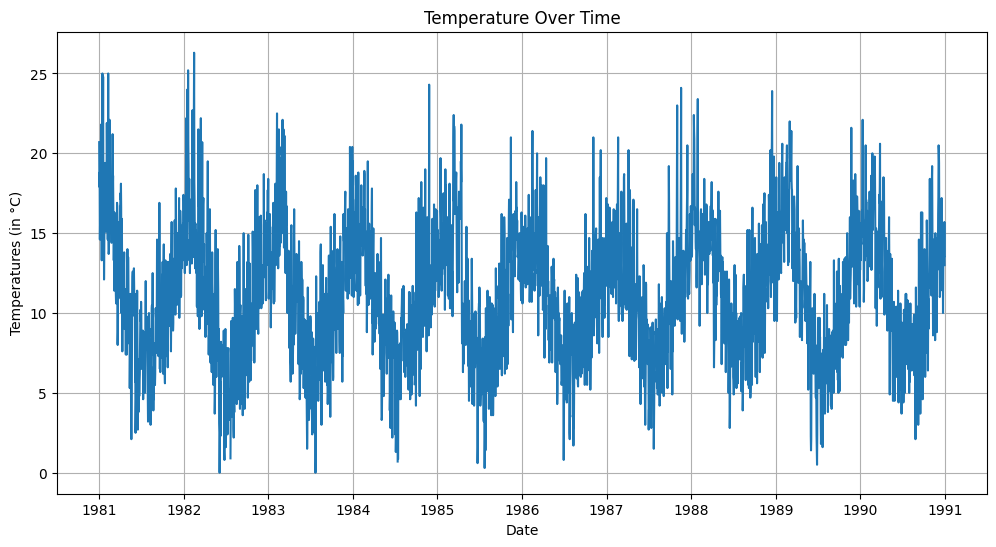

date    datetime64[ns]
temp           float64
dtype: object


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# load the data
path = 'data/daily-minimum-temperatures.csv'
temperatures = pd.read_csv(path, parse_dates=['Date'])
temperatures = temperatures.rename(columns={'Date':'date', 'Daily minimum temperatures':'temp'})
display(temperatures.head(5))

# visualize data
temperatures['temp'] = pd.to_numeric(temperatures['temp'], errors='coerce')

plt.figure(figsize=(12,6))
plt.plot(temperatures['date'], temperatures['temp'], linestyle='-', label='temperature')
plt.xlabel('Date')
plt.ylabel('Temperatures (in °C)')
plt.title('Temperature Over Time')
plt.grid(True)
plt.show()

print(temperatures.dtypes)

,ds,y
3464,1990-06-29,5.6
3465,1990-06-30,9.4
3466,1990-07-01,7.4
3467,1990-07-02,7.3
3468,1990-07-03,7.7


,ds,y
3469,1990-07-04,7.7
3470,1990-07-05,9.3
3471,1990-07-06,4.4
3472,1990-07-07,5.7
3473,1990-07-08,10.2


21:00:25 - cmdstanpy - INFO - Chain [1] start processing
21:00:25 - cmdstanpy - INFO - Chain [1] done processing


,ds
0,1981-01-01
1,1981-01-02
2,1981-01-03
3,1981-01-04
4,1981-01-05
...,...
3644,1990-12-26
3645,1990-12-27
3646,1990-12-28
3647,1990-12-29


,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1981-01-01,11.882340,12.096943,18.770982,11.882340,11.882340,3.397437,3.397437,3.397437,-0.015104,-0.015104,-0.015104,3.412541,3.412541,3.412541,0.0,0.0,0.0,15.279777
1,1981-01-02,11.880429,12.025721,18.643516,11.880429,11.880429,3.475219,3.475219,3.475219,-0.007497,-0.007497,-0.007497,3.482715,3.482715,3.482715,0.0,0.0,0.0,15.355648
2,1981-01-03,11.878519,11.964315,18.818032,11.878519,11.878519,3.554456,3.554456,3.554456,0.003430,0.003430,0.003430,3.551026,3.551026,3.551026,0.0,0.0,0.0,15.432975
3,1981-01-04,11.876608,11.986763,18.857699,11.876608,11.876608,3.456526,3.456526,3.456526,-0.159955,-0.159955,-0.159955,3.616481,3.616481,3.616481,0.0,0.0,0.0,15.333134
4,1981-01-05,11.874697,11.924743,18.833119,11.874697,11.874697,3.680346,3.680346,3.680346,0.002210,0.002210,0.002210,3.678136,3.678136,3.678136,0.0,0.0,0.0,15.555044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,1990-12-26,11.380177,11.386388,17.983557,11.354827,11.410743,3.095975,3.095975,3.095975,0.118171,0.118171,0.118171,2.977805,2.977805,2.977805,0.0,0.0,0.0,14.476153
3645,1990-12-27,11.379915,10.673902,17.837292,11.354285,11.410844,3.022007,3.022007,3.022007,-0.015104,-0.015104,-0.015104,3.037112,3.037112,3.037112,0.0,0.0,0.0,14.401922
3646,1990-12-28,11.379652,11.016423,17.709128,11.353744,11.410945,3.092801,3.092801,3.092801,-0.007497,-0.007497,-0.007497,3.100297,3.100297,3.100297,0.0,0.0,0.0,14.472452
3647,1990-12-29,11.379389,11.156493,18.030585,11.353203,11.411047,3.170134,3.170134,3.170134,0.003430,0.003430,0.003430,3.166704,3.166704,3.166704,0.0,0.0,0.0,14.549523


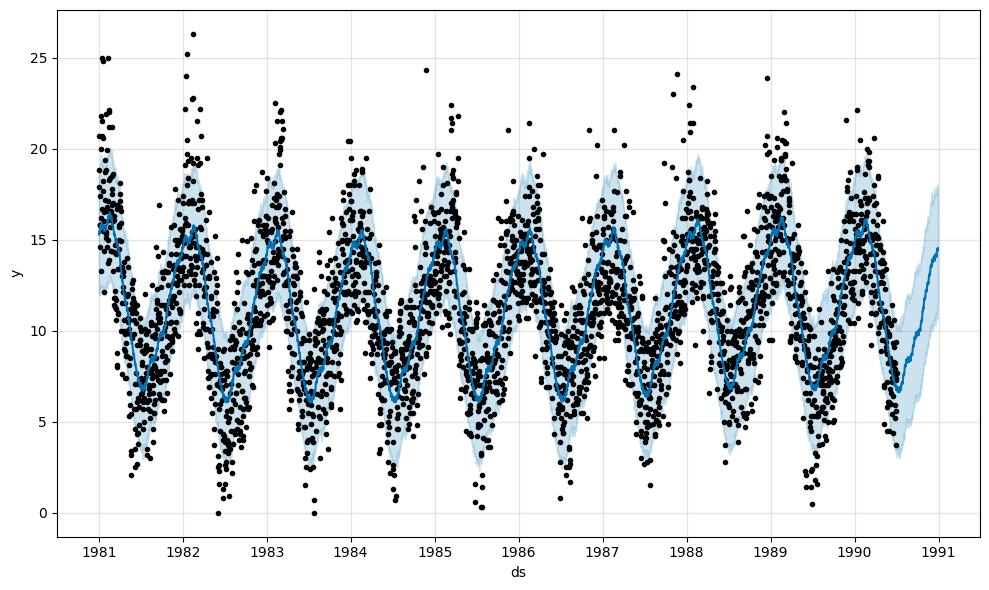

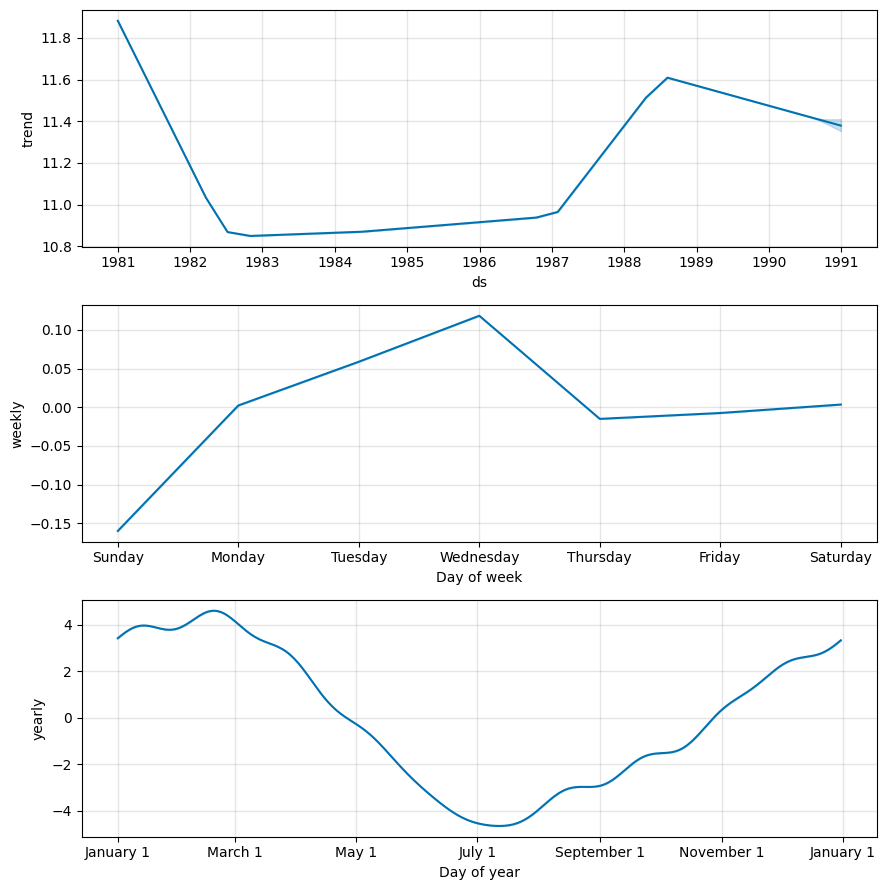

In [3]:
from prophet import Prophet

# initialize model
basic_prophet_model = Prophet()

# format input
temperatures = temperatures.rename(columns={'date':'ds', 'temp':'y'})
temperatures = temperatures.sort_values(by=['ds'])

# train/test split 
forecast_horizon = 30*6
is_in_test_set = temperatures['ds']>=(temperatures['ds'].max()-pd.Timedelta(days=forecast_horizon))
temperatures_test = temperatures[is_in_test_set]
temperatures_train = temperatures[~is_in_test_set]
display(temperatures_train.tail(), temperatures_test.head())

# train model
basic_prophet_model.fit(temperatures_train)

# generate prediction dates
future = basic_prophet_model.make_future_dataframe(periods=forecast_horizon, freq='D')
display(future)

# make the predictions
temperatures_forecast = basic_prophet_model.predict(future)
display(temperatures_forecast)

# plot the forecast
forecast_plot = basic_prophet_model.plot(temperatures_forecast)

# plot components
time_series_components = basic_prophet_model.plot_components(temperatures_forecast)

In [6]:
from prophet.diagnostics import cross_validation

# perform cross-validation
basic_prophet_model_cv = cross_validation(
    model= basic_prophet_model,
    horizon= f'{forecast_horizon} days',
    initial= f'{7*365} days',
    period= '15 days'
)

  0%|          | 0/50 [00:00<?, ?it/s]21:11:07 - cmdstanpy - INFO - Chain [1] start processing
21:11:07 - cmdstanpy - INFO - Chain [1] done processing
  2%|▏         | 1/50 [00:00<00:06,  7.59it/s]21:11:07 - cmdstanpy - INFO - Chain [1] start processing
21:11:07 - cmdstanpy - INFO - Chain [1] done processing
  4%|▍         | 2/50 [00:00<00:06,  7.28it/s]21:11:07 - cmdstanpy - INFO - Chain [1] start processing
21:11:08 - cmdstanpy - INFO - Chain [1] done processing
  6%|▌         | 3/50 [00:00<00:06,  7.71it/s]21:11:08 - cmdstanpy - INFO - Chain [1] start processing
21:11:08 - cmdstanpy - INFO - Chain [1] done processing
  8%|▊         | 4/50 [00:00<00:06,  7.60it/s]21:11:08 - cmdstanpy - INFO - Chain [1] start processing
21:11:08 - cmdstanpy - INFO - Chain [1] done processing
 10%|█         | 5/50 [00:00<00:06,  7.46it/s]21:11:08 - cmdstanpy - INFO - Chain [1] start processing
21:11:08 - cmdstanpy - INFO - Chain [1] done processing
 12%|█▏        | 6/50 [00:00<00:06,  7.13it/s]21:11:08

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,1 days,6.317273,2.513419,2.029736,0.231728,0.163715,0.199972,0.90
1,2 days,5.565705,2.359175,1.903828,0.201766,0.147761,0.178665,0.86
2,3 days,7.385888,2.717699,2.148834,0.269184,0.157235,0.211703,0.82
3,4 days,6.773916,2.602675,2.021582,0.284901,0.140260,0.200329,0.76
4,5 days,7.893406,2.809521,2.121222,0.489428,0.131474,0.208834,0.80
...,...,...,...,...,...,...,...,...
175,176 days,6.839313,2.615208,2.140449,0.228674,0.181804,0.203130,0.84
176,177 days,6.851575,2.617551,2.101513,0.230864,0.140663,0.198205,0.84
177,178 days,6.323752,2.514707,1.974805,0.185627,0.164237,0.176783,0.84
178,179 days,7.302999,2.702406,2.183538,0.279354,0.161682,0.212226,0.78


/Users/gclaus/Documents/Projects/Youtube/Time Series Forecasting with Prophet Part 1 The Basics/forecasting_with_prophet/myvenv/lib/python3.13/site-packages/prophet/plot.py:546: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt = df_none['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])
/Users/gclaus/Documents/Projects/Youtube/Time Series Forecasting with Prophet Part 1 The Basics/forecasting_with_prophet/myvenv/lib/python3.13/site-packages/prophet/plot.py:547: FutureWarning: Series.view is deprecated and will be removed in a future version. Use ``astype`` as an alternative to change the dtype.
  x_plt_h = df_h['horizon'].astype('timedelta64[ns]').view(np.int64) / float(dt_conversions[i])


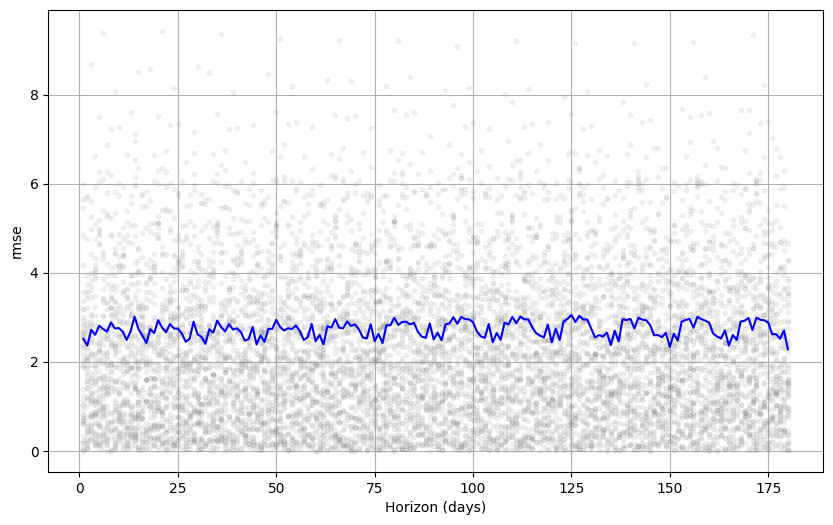

In [7]:
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

# compute accuracy metrics
basic_prophet_model_accuracy_metrics = performance_metrics(
    basic_prophet_model_cv,
    rolling_window=0
)
display(basic_prophet_model_accuracy_metrics)

# plot rmse
rmse_plot = plot_cross_validation_metric(
    basic_prophet_model_cv,
    rolling_window=0,
    metric='rmse'
)